## COMP5721M: Programming for Data Science 

## Coursework 3: Data Analysis Project


# UK Accidents and Casualties


* Kriti Garg, mm22kg@leeds.ac.uk
* Raghav Arora, mm22ra@leeds.ac.uk
* Baha Abdul Vahab, mm22bura@leeds.ac.uk
* Kartikeya Malimath, sc22kpm@leeds.ac.uk

# Project Plan
## The Data


For the safety of vehicles, passengers, and pedestrians, safety measures have been put in place on the roads. Statistics show that despite taking all the necessary precautions, there have frequently been accidents on the roads because of varying situations, environmental factors, and weather conditions. Due to this, we have chosen **UK Accidents and Casualties for the years 2011 and 2012** data to analyse what issues exist on a large scale and in which regions. We are analysing two datasets: **First** one, which contains all the information about the location and number of accidents, casualties and the surroundings in which the accidents occurred, **Second** one is the mapping Excel which comprises of the keys and value for the subsequent columns,For eg: for Accident Severity we have keys 1, 2 and 3 and in the mapping Excel we have values for it i.e. Fatal, Serious and Slight.

We have collected the data from [Kaggle](https://www.kaggle.com/datasets/devansodariya/road-accident-united-kingdom-uk-dataset?select=UK_Accident.csv) and [data.gov.uk](https://www.data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data) which is accumulated by the UK government from the traffic data. The data is clean with Accident_Index as the grain and no duplication is present, though there are few columns which are unneccessary and will be dropped in `Program Code` Section. Everything else looks good to work upon directly. 

***Note: Please use [Github](https://github.com/raghu98/UK-Accidents-and-Casualties) link in case you want to view the dataset***

The below table describes the key columns of our first dataset and their meaning:

|Column Name|Description|Data Type|
|-----------|-----------|-----------|
|Accident_Index| Unique Identifier of an accident(combination of year of accident and accident reference)|object|
|Longitude| Longitude of the place where accident took place|float64|
|Latitude|Latitude of the place where accident took place|float64|
|Police_Force | The Police on whose shoulders the responsibility for investigating the accident is|int64(1-98)|
|Accident_Severity | The Severity of the accident (Fatal, Serious, Slight)|int64(1,2,3)
|Number_of_Vehicles | Total Number of Vehicles involved in the accident|int64 |
|Number_of_Casualties| Total Number of casualties due to the accident| int64  |
|Date| The date of the accident|object|
|Day_of_Week | The day of the week(1-7{Monday-Sunday})|int64|
|Local_Authority_(District) | Under which district authority the accident happened|int64|
|Local_Authority_(Highway) | Under which Highway authority the accident happened|object|
|Road_Type | Type of the road i.e. singleway or dualway etc| object|
|Pedestrian_Crossing-Human_Control|By whom the Pedestrian crossing was controlled| object|
|Pedestrian_Crossing-Physical_Facilities| By which the crossing was controlled such as has zebra crossing, had pedestrian junction at traffic signal etc | object|
|Light_Conditions |Was it dark or was it during day-light |object|
|Weather_Conditions | Conditions such as if there was fog, or was fine, was raining or snowing etc|object|
|Road_Surface_Conditions | Conditions of the road such as dry, flooded, wet, normal, frost/ice, snow etc|object|
|Special_Conditions_at_Site | Any special conditions such as Mud, Oil or Diesel, Construction going on etc|object|
|Carriageway_Hazards | Anything or anyone that can be a reason for the accident i.e. pedestrian or an animal etc|object|
|Urban_or_Rural_Area | Contains 1,2,3 - will be mapped with mapping Excel to show if it is Urban, Rural or Unclassified|object|
|Did_Police_Officer_Attend_Scene_of_Accident | Contains Yes or No|object|
|Year| Year in which accident happened, in our case it will be 2011 or 2012|int64|

Below are the key columns of mapping Excel:

|Column Name|Description|Format| Label|
|-----------|-----------|-------|------|
|Field Name |Name of the column present in First Dataset|Key|Value |


## Project Aim and Objectives
The main goal of our project is to determine what adjustments an individual and the government should do in order to reduce the number of accidents. Highways, carriageways, police, local authorities, and pedestrian crossing are all designed for public safety and if an accident occurs as a result of one of these failings, those reasons should be identified so that appropriate action can be taken. We are attempting to address the Major causes  of Fatal or Severe accidents i.e. if they are due to human error or lack of physical facilities to blame. Also, The top cities with the highest accident rate and the top cities with the lowest accident rate, or places that are safest to live in.

![Data_Science](Data_Science.png)

### Specific Objective(s)

* __Objective 1:__ To identify the highest number of casualties in each year, their likely causes, and if the police responded to the scene of the accident.
* __Objective 2:__ What are the top 10 cities that had the maximum number of casualties.
* __Objective 3:__ To identify the relationship between the factors that are influencing the accidents and the number of casualties over the year, and their trend. In addition, we are attempting to understand the police response as per the reason.
* __Objective 4:__ What is the percentage change in the number of accidents corresponding to the cities and the major physical reasons such as road type, urban or rural.


## System Design

### Architecture

![Architecture](Architecture.png)
The **UK accidents/casualties** and **Road Safety Data Guide** (Mapping Excel) datasets, are needed for analysis. These datasets are then integrated based on the field-name and columns to populate the appropriate value of the keys provided. Following the left-join, data is merged from Accidents to Road Guide Excel. After that, the data is cleaned by removing the unnecessary columns, by changing the datatypes, adding missing numbers, or filtering the previous two year's of data. Following this, analysis is conducted to identify the correlation  between the features and whether any interesting patterns exist. There are instances when we must modify the data once again or even repeat the cleaning process as we move forward with the analysis. Once we believe the analysis is appropriate, visualisations are produced.

  
### Processing Modules and Algorithms

* __Cleaning:__
    - The following columns were eliminated because they lacked justification.
        - `Location_Easting_OSGR`, `Location_Northing_OSGR`, `1st_Road_Class`, `1st_Road_Number`, `Junction_Control`, `2nd_Road_Class`, `2nd_Road_Number`, `LSOA_of_Accident_Location`, `Time`, `Unnamed(0)`( This was coming because of the first row as a rownumber in Excel)
        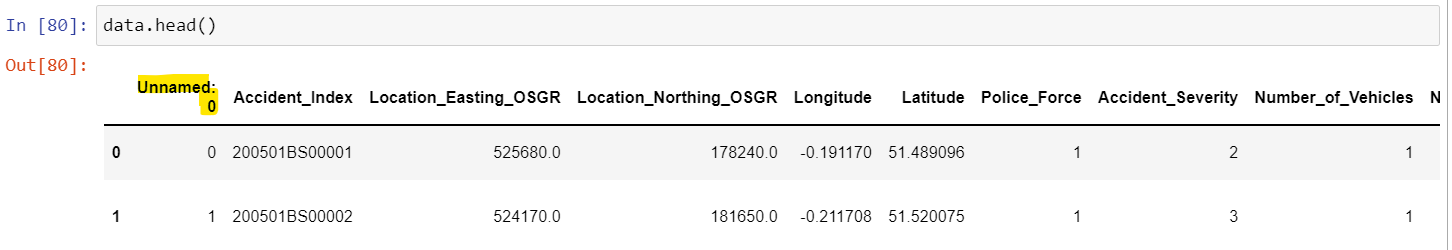

* __Joining of Datasets:__
    - Our primary dataset is **UK Road Accidents**, but we need a mapping for some columns such as **Accident Severity**, **Urban_or_Rural_Area**, **Local_Authority_(District)**. For example: we don't know what the value 1 or 2 means for severity or  for Urban_or_Rural. So we downloaded a mapping Excel from data.gov.uk and mapped the values to the corresponding columns.
    
* __Transformation:__
    - Updated the data types of Date column from object to Datetime64
    
* __Analysis and Visualization:__
    - Performed analysis to identify the regions with a high number of casualties, what combinations of reasons contribute to the accidents, the regions where accidents occurred based on the accident severity, and the percentage of accidents that resulted in Fatal Casualties and their visualisations plotted.

# Program Code

Importing Libraries which we will be using in this project

In [2]:
## Libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
import seaborn as sns
import decimal
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import calendar
import matplotlib.patches as mpatches

Reading first dataset **UK_Accident.csv** in a `DataFrame` using `pandas`

In [3]:
uk_acc_all_data = pd.read_csv("UK_Accident.csv")

The following cell performs cleaning of the dataset by removing the unwanted columns

In [4]:
uk_acc_all_data.drop(columns=['LSOA_of_Accident_Location',
                                 'Location_Easting_OSGR',
                                 'Location_Northing_OSGR',
                                 '1st_Road_Class',
                                 '1st_Road_Number',
                                 'Junction_Control',
                                 '2nd_Road_Class',
                                 '2nd_Road_Number',
                                 'Time',
                                 'Unnamed: 0'], inplace = True)

Filtering out the data for **2011 and 2012** in which we want to do analysis

In [5]:
uk_filter_data = uk_acc_all_data[uk_acc_all_data["Year"].isin([2011,2012])]

For our Analysis and Visualizations we require 3 new columns and these will be added to the `uk_filter_data DataFrame`
- Month - Extracting from Date column and converting the argument to numeric type
- Reason - Combining the values of `Road_Surface_Conditions` , `Light_Conditions` and `Weather_Conditions`
- First_day_of_month - Extracting the month/year and generating the first day of every month and year

In [6]:
uk_filter_data["month"] = pd.to_numeric(uk_filter_data["Date"].str[3:5])
uk_filter_data["reason"] = (uk_filter_data["Road_Surface_Conditions"] + "+" + 
                            uk_filter_data["Light_Conditions"]+"+"+
                            uk_filter_data["Weather_Conditions"]).astype(str)
uk_filter_data["First_day_of_month"] = pd.to_datetime(
    uk_filter_data["month"].astype(str) + "/01/" + 
    uk_filter_data["Year"].astype(str))

The below command shows the sum of all the null values if any

In [7]:
uk_filter_data.isnull().sum()

Accident_Index                                 0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
Road_Type                                      0
Speed_limit                                    0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Special_Conditions_at_Site                     0
Carriageway_Hazards                            0
Urban_or_Rural_Area 

From the above command's result we can see that there is no null value coming in data now.

Reading second dataset into a `DataFrame` using `pandas` read_excel function

In [8]:
#importing a new dataset- dim table
data_guide = pd.read_excel("Road-Safety-Open-Dataset-Data-Guide.xlsx")

Creating 3 different Dataframes for 3 seperate columns for whose key's, the values needs to be populated.
The below cell is mapping values for `local_authority_district` column

In [9]:
df_lad_mapping = data_guide[data_guide["field name"] == 'local_authority_district']\
[["code/format","label"]].rename(columns = {
    "code/format":"Local_Authority_(District)",
    "label":"Local_Authority_District_value"})

The below cell is mapping values for `urban_or_rural_area` column

In [10]:
df_uor_mapping = data_guide[data_guide["field name"] == 'urban_or_rural_area']\
[["code/format","label"]].rename(columns = {
    "code/format":"Urban_or_Rural_Area","label":"Urban_or_Rural_Area_value"})

The below cell is mapping values for `casualty_severity` column

In [11]:
df_sev_mapping = data_guide[data_guide["field name"] == 'casualty_severity']\
[["code/format","label"]].rename(columns = {
    "code/format":"Accident_Severity","label":"Accident_Severity_value"})

Left Joining the above 3 `DataFrame's` with the uk_filter_data and inserting the values of the columns in the DataFrame

In [12]:
left1 = pd.merge(uk_filter_data, df_lad_mapping, on = 'Local_Authority_(District)'
                 , how = 'left')
left2 = pd.merge(left1,df_uor_mapping,on = 'Urban_or_Rural_Area', how = 'left')
left3 = pd.merge(left2,df_sev_mapping,on = 'Accident_Severity', how = 'left')
uk_filter_data = left3

Checking if the data types of all the columns are as expected.

In [13]:
uk_filter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331189 entries, 0 to 331188
Data columns (total 29 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Accident_Index                               331189 non-null  object        
 1   Longitude                                    331189 non-null  float64       
 2   Latitude                                     331189 non-null  float64       
 3   Police_Force                                 331189 non-null  int64         
 4   Accident_Severity                            331189 non-null  object        
 5   Number_of_Vehicles                           331189 non-null  int64         
 6   Number_of_Casualties                         331189 non-null  int64         
 7   Date                                         331189 non-null  object        
 8   Day_of_Week                                  331189 non-null  in

As can be seen that `Date` and `Severity` is of `Object` dtype.
Updating the data type of `Date` to datetime and `Accident Severity` to int

In [14]:
uk_filter_data["Date"] = pd.to_datetime(uk_filter_data["Date"])
uk_filter_data["Accident_Severity"] = pd.to_numeric(
    uk_filter_data["Accident_Severity"])

### Objective 1:

Creating a `DataFrame` df, grouping up on the basis of the new column `First_day_of_month` created and aggregating on `Number_of_Casualties`

In [15]:
df = uk_filter_data.groupby(["First_day_of_month"])["Number_of_Casualties"]\
.agg(['sum','count']).reset_index()

Below cell creates another Dataframe defining the `First_day_of_month` along with the casualties corresponding to the `Reason`

In [16]:
uk_bar_graph_data_natural = uk_filter_data.groupby(
    ["First_day_of_month","reason"])["Number_of_Casualties"].sum().reset_index()

Fetching the top 5 reasons resulting in highest number of casualties for `2011` and `2012` years separately

In [17]:
# taking tops resons to plot the data in pie chart of 2011
df_2011 = uk_bar_graph_data_natural[uk_bar_graph_data_natural["First_day_of_month"]\
         ==datetime.datetime(2011,10,1)]\
        .sort_values("Number_of_Casualties",ascending=False).head(5)

# taking tops resons to plot the data in pie chart of 2012
df_2012 = uk_bar_graph_data_natural[uk_bar_graph_data_natural["First_day_of_month"]\
           ==datetime.datetime(2012,10,1)]\
          .sort_values("Number_of_Casualties",ascending=False).head(5)

Below command defines a `DataFrame` df_bar_police that tell us did the police attended the accident or not.

In [18]:
df_bar_police = uk_filter_data\
.groupby(["First_day_of_month","Did_Police_Officer_Attend_Scene_of_Accident"]) \
                ["Number_of_Casualties"].agg(['sum','count']).reset_index() 

Below function converts the number to percentages

In [19]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

In the below command we are using **Gridspec** to create 3 figures in a single layout on top of that we are using **matplotlib. patches** library to create the arrows between 1 line graph chart and 2 pie charts to be more decisive

In [20]:
def plot_obj1():
    fig = plt.figure(figsize=(15,15))
    #using gridspec to create the visual in the single space 
    gs = GridSpec(2, 2, figure=fig)
    #plotting for the first visual starting
    ax1 = fig.add_subplot(gs[0, :])
    ax1.set_title('Accident & Causality VS Year-Month')
    l1 = ax1.plot("First_day_of_month","sum",data=df,marker='o',
                  markersize = 4,label="# of Causality")
    ax_new = ax1.twinx()
    l2 = ax_new.plot("First_day_of_month","count",data=df,marker='o',
                     markersize = 4,color = "red", 
                     label = "# of Accidents")
    #adding legends and label for 1st graph
    lns = l1+l2
    labs = [l.get_label() for l in lns]
    ax1.legend(lns,labs)
    ax1.set_xlabel("Year-Month")
    ax1.set_ylabel("Causality")
    ax_new.set_ylabel("Accidents")
    #second graph plot start
    ax2 = fig.add_subplot(gs[1, :-1])
    ax2.set_title('Top 5 Reasons for Oct-2011')
    reason1 = df_2011["reason"].to_list()
    data1 = df_2011["Number_of_Casualties"].to_list()
    colors_pie = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
    wedges, texts, autotexts  = ax2.pie(data1,autopct=lambda pct: func(
                                pct, data1), colors= colors_pie)
    ax2.legend(wedges, reason1,
              title="Reasons",
              loc="center left",
              bbox_to_anchor=(0,-0.1,1,0)
              )
    #using connection patch to create the arrow from 1st graph to second
    con = ConnectionPatch(  xyA=(datetime.date(2011, 10, 1), 18479),
                            coordsA="data",
                            xyB=(0,1), 
                            coordsB=ax2.transData,
                            axesA=ax1,
                            axesB=ax2,
                            arrowstyle="-|>", shrinkA=5, shrinkB=5,
                            mutation_scale=20, fc="w")
    #displaying the arrow
    ax2.add_artist(con)
    #3rd plot start in gridspec
    ax5 = fig.add_subplot(gs[1:2,1])
    ax5.set_title('Top 5 Reasons for Oct-2012')
    reason4 = df_2012["reason"].to_list()
    data4 = df_2012["Number_of_Casualties"].to_list()
    colors_pie = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
    wedges, texts, autotexts  = ax5.pie(data4,autopct=lambda pct: func(
                                pct, data4),colors= colors_pie)
    ax5.legend(wedges, reason4,
              title="Reasons",
              loc="center left",
              bbox_to_anchor=(0, -0.1, 0, 0)
             )
    #using connection patch to get the arrow from 1st visual to 3rd visual
    con = ConnectionPatch(  xyA=(datetime.date(2012, 10, 1), 21472),
                            coordsA="data",
                            xyB=(0,1), 
                            coordsB=ax5.transData,
                            axesA=ax1,
                            axesB=ax5,
                            arrowstyle="-|>", shrinkA=5, shrinkB=5,
                            mutation_scale=20, fc="w")
    #displaying arrow
    ax5.add_artist(con)

In the below command we are ploting the data between police response over the year

In [21]:
def plot_police():
    fig, ax = plt.subplots(figsize=(10,5))
    index = np.arange(24)
    labels = df_bar_police\
    [df_bar_police["Did_Police_Officer_Attend_Scene_of_Accident"]=="Yes"] \
    ["First_day_of_month"].astype("str").to_list()
    bar_width = 0.4
    ax.bar(index-0.2,\
           df_bar_police[df_bar_police[
           "Did_Police_Officer_Attend_Scene_of_Accident"]=="Yes"]\
           ["count"],bar_width,label = "Yes")
    ax.bar(index+0.2, \
           df_bar_police[df_bar_police[
           "Did_Police_Officer_Attend_Scene_of_Accident"]=="No"]\
           ["count"],bar_width,label = "No")
    ax.plot(index,df["count"],bar_width)
    ax.legend(title = "police arrived on location",fontsize=7, title_fontsize=7)
    ax.set_xticks(index, labels, rotation=45, ha='right');

### Objective 2:

Below command creates new Dataframe `df_uk_region_reason` by grouping District, Reason, Severity and summing up by the number of casualties.

In [22]:
df_uk_region_reason = uk_filter_data.groupby(["Local_Authority_District_value",
                                              "reason", "Accident_Severity_value", 
                                              "Accident_Severity"])\
["Number_of_Casualties"].sum().reset_index()

- The first dataframe contains the information of Number of Casualties per every region and is done by group by and sum python functions
- The second contains the top 10 regions which reported the highest number of casualties
- And the third contains the bottom 10 regions which reported the least number of casualties

In [23]:
#creating a region specific dataframe
df_uk_only_region =df_uk_region_reason.groupby(["Local_Authority_District_value"])\
                   ["Number_of_Casualties"].sum().reset_index()
#identifiying top 10 and bottom 10 locations in uk 
df_uk_top10_region = df_uk_only_region.sort_values(by=["Number_of_Casualties"]
                        ,ascending=False).head(10)
df_uk_bottom10_region = df_uk_only_region\
                        [df_uk_only_region["Local_Authority_District_value"]!= 
                        "London Airport (Heathrow)"].sort_values(by=\
                        ["Number_of_Casualties"],ascending=False).tail(10)

The below command takes the above grouped Dataframe and shows only the reason with the number of Casualties which then is used to identify the top 10 reasons that are resulting in the maximum number of Casualties.

In [24]:
# creating reason specific data frame
df_uk_only_reason = df_uk_region_reason.groupby(["reason"])\
                    ["Number_of_Casualties"].sum().reset_index()
#identifiying top 10 reasons for the accidents 
df_uk_top10_reason = df_uk_only_reason.sort_values(by=["Number_of_Casualties"]
                    ,ascending=False).head(10)

In the below command we are fetching those records in the dataframe where those regions had the maximum number of casualties and then using this dataframe we are simultaneously fetching the records with the top 10 reasons of the mishappenings.

In [25]:
# joining reason and region data uk main data to get the final result 
top_10_final_df=  pd.merge(df_uk_region_reason, 
                           df_uk_top10_region["Local_Authority_District_value"], 
                           on = 'Local_Authority_District_value', how = 'inner')
top_10_final_df = pd.merge(top_10_final_df,df_uk_top10_reason["reason"]
                           ,on="reason",how = "inner")

In the Above command we fetched the top regions and reasons and in the below we are fetching the bottom 10 regions and reasons where the casualties were highest

In [26]:
df_uk_only_reason_bottom = df_uk_region_reason.groupby(["reason",
                           "Local_Authority_District_value"], dropna=False)\
                           ["Number_of_Casualties"].sum().reset_index()
df_uk_bottom_reason = pd.merge(df_uk_only_reason_bottom,df_uk_bottom10_region
                      ["Local_Authority_District_value"],
                      on = "Local_Authority_District_value", how="inner")
df_uk_bottom10_reason = df_uk_bottom_reason.groupby("reason",dropna=False)\
                ["Number_of_Casualties"].sum().reset_index()\
                .sort_values(by="Number_of_Casualties",ascending=False).head(10)

In the below command we are joining our all data of region and reason with the top 10 regions we are doing inner join this will filter our data and only keep the top 10 region data with all their corresponding reason

In the second line in the same df, now we are joining the data with the top 10 reasons for accidents with the previously filtered data, now finally we will only have the top 10 regions and corresponding to those region top 10 reasons for each region in the dataframe

In [27]:
bottom_10_final_df=  pd.merge(df_uk_region_reason, df_uk_bottom10_region[
    "Local_Authority_District_value"],on = 'Local_Authority_District_value', 
                              how = 'inner')
bottom_10_final_df = pd.merge(bottom_10_final_df,
                              df_uk_bottom10_reason["reason"],
                              on="reason", how = "inner")

In the command below we are grouping, summing the data with the region and severity and getting a dataframe that has all the severity with the region 

In the next statment we are joining it with the top 10 region that we identified earlier to only keep those regions

In [28]:
## top severity
df_uk_region_severity = df_uk_region_reason.groupby([
    "Local_Authority_District_value","Accident_Severity",
    "Accident_Severity_value"],dropna=False)["Number_of_Casualties"]\
    .sum().reset_index()
#joining with top 10 regions to get the information
df_uk_region_severity_top10 = pd.merge(df_uk_region_severity,
                        df_uk_top10_region["Local_Authority_District_value"],
                        on="Local_Authority_District_value",how="inner")

In the command below we are doing the same thing but with the bottom 10 of our list. 

In [29]:
## bottom severirty
df_uk_region_severity_bottom10=pd.merge(df_uk_region_severity, 
                    df_uk_bottom10_region["Local_Authority_District_value"],
                    on="Local_Authority_District_value", how="inner")
df_uk_region_severity_bottom10.loc[-1] = ["Shetland Islands", 1,"Fatal",0] 

In the command below, we are using the seaborn library to create a heatmap. We are explicitly providing the label for X axis, then we are creating a legend table without any border that will give the full form of the abbreviation


In [30]:
def heatmap():
    heat= top_10_final_df.groupby(["Local_Authority_District_value","reason"]) \
        ["Number_of_Casualties"].sum().unstack().fillna(0)
    #creating label as the reason are too big to disply in the visual
    labelx = ["R1","R2","R3","R4","R5","R6","R7","R8","R9","R10"]
    # labely = heat.reset_index()["Local_Authority_District_value"].to_list()
    sns.heatmap(heat,cmap="RdBu",square = True,linewidth =1,xticklabels=labelx)
    cell_text= [[i] for i in top_10_final_df["reason"].drop_duplicates()
                .to_list()]
    the_table = plt.table(cellText =cell_text ,rowLabels=labelx,
                          colLabels=["Fullform"], bbox = (0,-1.2,1,1),
                          cellLoc="left",edges = "")
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(8)

In the next command we are creating three Dataframes that will help us in creating the bar chart with table.

- ***data*** - here we are creating the list of list that will be passed into the bar graph plot, and because we are creating a stack plot we need to creat a list of list.
- ***columns*** - this is the xaxis/ the table header that will be displayed in the visual
- ***rows*** - this the row heading for the table

In [31]:
data =  [df_uk_region_severity_top10[df_uk_region_severity_top10[
        "Accident_Severity"]==3]["Number_of_Casualties"].to_list(),
        df_uk_region_severity_top10[df_uk_region_severity_top10[
        "Accident_Severity"]==2]["Number_of_Casualties"].to_list(),
        df_uk_region_severity_top10[df_uk_region_severity_top10[
        "Accident_Severity"]==1]["Number_of_Casualties"].to_list()]

cell_text = [df_uk_region_severity_top10[df_uk_region_severity_top10[
        "Accident_Severity"]==3]["Number_of_Casualties"].to_list(),
        df_uk_region_severity_top10[df_uk_region_severity_top10[
        "Accident_Severity"]==2]["Number_of_Casualties"].to_list(),
        df_uk_region_severity_top10[df_uk_region_severity_top10[
        "Accident_Severity"]==1]["Number_of_Casualties"].to_list()]

# col = df_uk_region_severity_top10[["Local_Authority_District_value"]].
#drop_duplicates()
columns=('Barnet', 'Birmingham',' Bradford', 'Cheshire East', 'Cheshire West', 
         'Cornwall', 'County Durham', 'Leeds','Liverpool','Manchester')

rows = df_sev_mapping["Accident_Severity_value"].to_list()

In the command below we are plotting a bar graph with the table at its bottom that will act as 
the legend for the x-axis of the bar graph and table header for the table graph

In [32]:
def CbyR():
    # Get some pastel shades for the colors -BuPu
    colors = plt.cm.Accent(np.linspace(0, 0.5, len(rows)))
    n_rows = len(data)
    index = np.arange(len(columns)) + 0.3
    bar_width = 0.4
    # Initialize the vertical-offset for the stacked bar chart.
    y_offset = np.zeros(len(columns))
    fig,ax = plt.subplots(figsize = (15,7))
    # Plot bars and create text labels for the table
    for row in range(n_rows):
        ax.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
        y_offset = y_offset + data[row]
    # Reverse colors and text labels to display the last value at the top.
    colors = colors[::-1]
    cell_text.reverse()
    # Add a table at the bottom of the axes
    the_table = ax.table(cellText=cell_text,
                          rowLabels=rows,
                          rowColours=colors,
                          colLabels=columns,
                          loc='bottom')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    # Adjust layout to make room for the table:
    # plt.subplots_adjust(left=0.2, bottom=0.2)
    plt.ylabel("Number of Casulties")
    plt.xticks([])
    plt.title('Casulties by Region')
    plt.show()

Similarly, as in heatmap() using seaborn library heatmap is created but by passing different set of data points

In [33]:
def heatmap2():
    heat_bottom = bottom_10_final_df.groupby(["Local_Authority_District_value",
                  "reason"],dropna=False)["Number_of_Casualties"]\
                  .sum().unstack().fillna(0)
    labelx = ["R1","R2","R3","R4","R5","R6","R7","R8","R9","R10"]
    # labely = heat.reset_index()["Local_Authority_District_value"].to_list()
    sns.heatmap(heat_bottom,cmap="seismic",square = True,linewidth =1,
                xticklabels=labelx)

    cell_text = [[i] for i in bottom_10_final_df["reason"].drop_duplicates()
                 .to_list()]
    the_table = plt.table(cellText =cell_text ,rowLabels=labelx,colLabels=
                ["Fullform"],bbox = (0,-1.2,1,1),cellLoc="left",edges = "")
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(8)

In the below command data for table bar chart is organised and accumulated on the basis of accident severity 

In [34]:
data1 = [df_uk_region_severity_bottom10[df_uk_region_severity_bottom10[
        "Accident_Severity"]==3]["Number_of_Casualties"].to_list(),
        df_uk_region_severity_bottom10[df_uk_region_severity_bottom10[
        "Accident_Severity"]==2]["Number_of_Casualties"].to_list(),
        df_uk_region_severity_bottom10[df_uk_region_severity_bottom10[
        "Accident_Severity"]==1]["Number_of_Casualties"].to_list()]

cell_text1 = [df_uk_region_severity_bottom10[df_uk_region_severity_bottom10[
            "Accident_Severity"] == 3]["Number_of_Casualties"].to_list(), 
            df_uk_region_severity_bottom10[df_uk_region_severity_bottom10[
            "Accident_Severity"] == 2]["Number_of_Casualties"].to_list(),
            df_uk_region_severity_bottom10[df_uk_region_severity_bottom10[
            "Accident_Severity"] == 1]["Number_of_Casualties"].to_list()]

col = df_uk_region_severity_bottom10[["Local_Authority_District_value"]]\
.drop_duplicates()
columns = tuple(col["Local_Authority_District_value"])
# ('Barnet','Birmingham','Bradford','Cheshire East','Cheshire West',
#'Cornwall','County Durham','Leeds','Liverpool',
# 'Manchester')
rows = df_sev_mapping["Accident_Severity_value"].to_list()

Now, below is the code for creation of stacked bar-chart with table

In [35]:
def CbyR_best():
    # Get some pastel shades for the colors -BuPu
    colors = plt.cm.tab20(np.linspace(0, 0.5, len(rows)))
    n_rows = len(data1)
    index = np.arange(len(columns)) + 0.3
    bar_width = 0.4
    # Initialize the vertical-offset for the stacked bar chart.
    y_offset = np.zeros(len(columns))
    fig,ax = plt.subplots(figsize = (15,7))
    # Plot bars and create text labels for the table
    for row in range(n_rows):
        ax.bar(index, data1[row], bar_width, bottom=y_offset, color=colors[row])
        y_offset = y_offset + data1[row]
    # Reverse colors and text labels to display the last value at the top.
    colors = colors[::-1]
    cell_text1.reverse()
    # Add a table at the bottom of the axes
    the_table = ax.table(cellText=cell_text1,
                          rowLabels=rows,
                          rowColours=colors,
                          colLabels=columns,
                          loc='bottom')
    the_table.auto_set_font_size(False)
    the_table.set_fontsize(10)
    # Adjust layout to make room for the table:
    # plt.subplots_adjust(left=0.2, bottom=0.2)
    plt.ylabel("Number of Casulities")
    plt.xticks([])
    plt.title('Casulities by Region')
    plt.show()

### Objective 3:

In the below command we are fetching the sum and count of Severities corresponding to the first day of every month in a year

In [36]:
df_severity = uk_filter_data.groupby(["First_day_of_month","Accident_Severity"]) \
            ["Number_of_Casualties"].agg(['sum','count']).reset_index()

In the below command we are manupulating the data
- Selecting only the required data points
- Pivoting the selected data to get in desired format that will be used in the stackplot   

In [37]:
#fetching only 3 columns
df_severity = df_severity[["First_day_of_month","Accident_Severity","sum"]]
#setting the index from default to first day of month
df_severity = df_severity.set_index("First_day_of_month")
#made the columns as severity
df_severity = df_severity.pivot(columns='Accident_Severity')
#reseting index
df_severity = df_severity["sum"].reset_index()
#renaming the columns
df_severity = df_severity.rename(columns = {1:"y1",2:"y2",3:"y3"})

In the below command we are creating the plot using the stackplot function provided by the matplotlib library using the `df_severity` dataframe created earlier

In [38]:
def scvsYear():
    fig,ax1 = plt.subplots(figsize=(10,6))

    ax1.set_title('Severity & Causality VS yearmonth')
    ax1.stackplot(
        'First_day_of_month',
        'y3',
        'y2',
        'y1',
        data=df_severity,
        colors=['pink', 'purple', 'red'],
        alpha=0.5
    )
    #adding legends and label for 1st graph
    labels = ["Slight", "Serious","Fatal" ]
    ax1.legend(labels)
    ax1.set_xlabel("YearMonth")
    ax1.set_ylabel("Causality")
    ax1.set_ylim(0, 26000,5000)
    plt.xticks(rotation = 45);

In the command below we are grouping the data on reason and accident severity to get only the required columns.
After which we are joining with the top reasons dataframe created in objective 2 to only get the data for those particular reasons

In [39]:
df_uk_reason_sev = uk_filter_data.groupby(["reason","Accident_Severity"]) \
                    ["Number_of_Casualties"].sum().reset_index()
df_uk_reason_sev = pd.merge(df_uk_reason_sev,df_uk_top10_reason["reason"],
                            on="reason",how="inner")

In the command below we are pivoting the data to suffice our need to create a horizontal bar chart.<br>
With that, we will have 4 reason columns, and remaining will be the sum of casualties by each severity in each column

In [40]:
df_uk_reason_sev = df_uk_reason_sev.set_index("reason").pivot(columns = [\
    "Accident_Severity"])
df_uk_reason_sev

Number_of_Casualties  \
Accident_Severity                                                     1   
reason                                                                    
Dry+Darkeness: No street lighting+Fine without ...                  698   
Dry+Darkness: Street lighting unknown+Fine with...                   48   
Dry+Darkness: Street lights present and lit+Fin...                  702   
Dry+Daylight: Street light present+Fine without...                 2996   
Wet/Damp+Darkeness: No street lighting+Fine wit...                  340   
Wet/Damp+Darkeness: No street lighting+Raining ...                  146   
Wet/Damp+Darkness: Street lights present and li...                  243   
Wet/Damp+Darkness: Street lights present and li...                  158   
Wet/Damp+Daylight: Street light present+Fine wi...                  442   
Wet/Damp+Daylight: Street light present+Raining...                  372   

                                                                   
Accident_Severity                                       2       3  
reason                                                             
Dry+Darkeness: No street lighting+Fine without ...   2675    7292  
Dry+Darkness: Street lighting unknown+Fine with...    582    3273  
Dry+Darkness: Street lights present and lit+Fin...   7746   39399  
Dry+Daylight: Street light present+Fine without...  33454  195662  
Wet/Damp+Darkeness: No street lighting+Fine wit...   1294    4025  
Wet/Damp+Darkeness: No street lighting+Raining ...    831    3075  
Wet/Damp+Darkness: Street lights present and li...   2392   12098  
Wet/Damp+Darkness: Street lights present and li...   2266   12885  
Wet/Damp+Daylight: Street light present+Fine wi...   5133   28890  
Wet/Damp+Daylight: Street light present+Raining...   4332   30181

Here we are converting the data in a dictionary and then passing that data into the visual so that we can run a loop over it and plot the stack horizontal bar chart with different colors for each severity

In [41]:
category_names = ["Slight","Serious","Fatal",]
results = {
    'R1': df_uk_reason_sev["Number_of_Casualties"].iloc[0].to_list()[::-1],
    'R2': df_uk_reason_sev["Number_of_Casualties"].iloc[1].to_list()[::-1],
    'R3': df_uk_reason_sev["Number_of_Casualties"].iloc[2].to_list()[::-1],
    'R4': df_uk_reason_sev["Number_of_Casualties"].iloc[3].to_list()[::-1],
    'R5': df_uk_reason_sev["Number_of_Casualties"].iloc[4].to_list()[::-1],
    'R6': df_uk_reason_sev["Number_of_Casualties"].iloc[5].to_list()[::-1],
    'R7': df_uk_reason_sev["Number_of_Casualties"].iloc[6].to_list()[::-1],
    'R8': df_uk_reason_sev["Number_of_Casualties"].iloc[7].to_list()[::-1],
    'R9': df_uk_reason_sev["Number_of_Casualties"].iloc[8].to_list()[::-1],
    'R10': df_uk_reason_sev["Number_of_Casualties"].iloc[9].to_list()[::-1]
}
def severity():
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps['tab20b'](
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')
    plt.show()

### Objective 4:

In the below command, we are taking the sum of casualties for 2011 & 2012 by grouping the year and conditions: road, light and weather

In [42]:
df_combined = uk_acc_all_data[uk_acc_all_data["Year"].isin([2011, 2012])]
uk_bar_graph_data_natural = df_combined.groupby(
    ["Year", "Road_Surface_Conditions", "Light_Conditions", "Weather_Conditions"])\
    ["Number_of_Casualties"].sum()
uk_bar_graph_data_natural = uk_bar_graph_data_natural.reset_index()

1 Creating two dataframes and taking only top 15 records for 2011 & 2012 which is sorted based on the no of casualties.<br>
2 New column is created in both the dataframes using the lambda function by concatenating the columns (Road_Surface_Conditions, Light_Conditions, Weather_Conditions) for all the rows

In [43]:
df_line_plot_2011 = uk_bar_graph_data_natural[uk_bar_graph_data_natural["Year"]
                    == 2011].sort_values("Number_of_Casualties", 
                    ascending = False).head(15)
df_line_plot_2011['Reasons'] = df_line_plot_2011.apply(lambda row: (
    row['Road_Surface_Conditions'] + '+' +row['Light_Conditions'] + '+' + 
    row['Weather_Conditions']), axis = 1)
df_line_plot_2012 = uk_bar_graph_data_natural[(uk_bar_graph_data_natural["Year"]
                    == 2012)].sort_values("Number_of_Casualties",
                    ascending=False).head(15)
df_line_plot_2012['Reasons'] = df_line_plot_2012.apply(lambda row: (
    row['Road_Surface_Conditions'] + '+' + row['Light_Conditions'] + '+' + 
    row['Weather_Conditions']), axis = 1)

In the below command, 
Firstly, Both the years data is merged based on the **Reasons** column and then the Number of casualties are stored as a list for 2011 & 2012 in two variables and the reasons are stored in a separate variable as list

In [44]:
merged_plot_df = pd.merge(df_line_plot_2011, df_line_plot_2012, on = 'Reasons', 
                          suffixes=('_2011', '_2012')).head(10)
merged_plot_df = merged_plot_df.sort_values("Reasons", ascending = False)

no_of_casualties_2011_list = merged_plot_df['Number_of_Casualties_2011'].tolist()
no_of_casualties_2012_list = merged_plot_df['Number_of_Casualties_2012'].tolist()
reasons_list_line = merged_plot_df['Reasons'].tolist()

Below function will be plotting the line chart using matplotlib based on the Reasons column for 2011 & 2012.

In [45]:
def reason_casulties():
    plt.rcParams["figure.figsize"] = [12, 5]
    plt.rcParams["figure.autolayout"] = True

    r1 = mpatches.Patch(color = 'white', label = 'R1 - ' + reasons_list_line[0])
    r2 = mpatches.Patch(color = 'white', label = 'R2 - ' + reasons_list_line[1])
    r3 = mpatches.Patch(color = 'white', label = 'R3 - ' + reasons_list_line[2])
    r4 = mpatches.Patch(color = 'white', label = 'R4 - ' + reasons_list_line[3])
    r5 = mpatches.Patch(color = 'white', label = 'R5 - ' + reasons_list_line[4])
    r6 = mpatches.Patch(color = 'white', label = 'R6 - ' + reasons_list_line[5])
    r7 = mpatches.Patch(color = 'white', label = 'R7 - ' + reasons_list_line[6])
    r8 = mpatches.Patch(color = 'white', label = 'R8 - ' + reasons_list_line[7])
    r9 = mpatches.Patch(color = 'white', label = 'R9 - ' + reasons_list_line[8])
    r10 = mpatches.Patch(color = 'white', label = 'R10 - ' + reasons_list_line[9])

    plt.legend(handles=[r1, r2, r3, r4, r5, r6, r7, r8, r9, r10])

    axes = plt.gca()

    merged_plot_df.plot(kind = 'line', x = 'Reasons', 
                        y = 'Number_of_Casualties_2011', ax = axes);
    merged_plot_df.plot(kind = 'line', x = 'Reasons', 
                        y = 'Number_of_Casualties_2012', ax = axes);

    axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
    axes.set_ylabel('No of Casualtes')
    axes.set_title('Casualties based on the Road, Light and Weather Conditions')
    axes.set_xticklabels(('R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 
                          'R10'))

    plt.show()

Taking the sum of casualties for 2011 & 2012,  grouping on column `Did_Police_Officer_Attend_Scene_of_Accident`(has two values Yes or No) and conditions: road, light and weather. Then the new column `Reasons` is created in both the dataframes using the lambda function by concatenating the columns (Road_Surface_Conditions, Light_Conditions, Weather_Conditions).

In [46]:
df_bar_plot = df_combined.groupby(
    ["Did_Police_Officer_Attend_Scene_of_Accident", "Road_Surface_Conditions",
     "Light_Conditions","Weather_Conditions"])["Number_of_Casualties"].sum()
df_bar_plot = df_bar_plot.reset_index()
df_bar_plot = df_bar_plot.sort_values(['Number_of_Casualties'], 
                                      ascending = [False])
df_bar_plot['Reasons'] = df_bar_plot.apply(lambda row: (
    row['Road_Surface_Conditions'] + '+' +row['Light_Conditions'] + '+' + 
    row['Weather_Conditions']), axis = 1)

In the below command we are creating two dataframes depending on if the police officer atteneded the scene of accident, later sorting based on the no of casualties out of which top 20 records are taken. At last, top 20 are taken by merging both years dataframes based on Reasons column.

In [47]:
df_bar_plot_police_attended_yes = df_bar_plot[(
    df_bar_plot["Did_Police_Officer_Attend_Scene_of_Accident"]== "Yes")]\
    .sort_values("Number_of_Casualties", ascending=False).head(20)
df_bar_plot_police_attended_no = df_bar_plot[(
    df_bar_plot["Did_Police_Officer_Attend_Scene_of_Accident"]== "No")]\
    .sort_values("Number_of_Casualties", ascending=False).head(20)
merged_bar_plot_df = pd.merge(df_bar_plot_police_attended_yes, 
    df_bar_plot_police_attended_no, on = 'Reasons', suffixes=('_Yes', '_No'))\
    .head(10)
merged_bar_plot_df = merged_bar_plot_df.sort_values("Reasons", 
                                                    ascending = False)

Creating list for 2 categories for the police attending the scene of accident and a list for Reasons

In [48]:
no_of_casualties_police_attended_yes_list = merged_bar_plot_df[
                                        'Number_of_Casualties_Yes'].tolist()
no_of_casualties_police_attended_no_list = merged_bar_plot_df[
                                        'Number_of_Casualties_No'].tolist()
reasons_list_bar = merged_bar_plot_df['Reasons'].tolist()

Below command defines the function which will be plotting the bar chart  based on whether the police attended the scene or not.

In [49]:
def Police_severity():
    plt.rc('figure', figsize=(12, 5))

    x_axis = np.arange(len(merged_bar_plot_df))

    plt.bar(x_axis, no_of_casualties_police_attended_yes_list, width = 0.2, 
                                    color='orange')
    plt.bar(x_axis +0.20, no_of_casualties_police_attended_no_list, width = 0.2,
                                    color='green')

    plt.xticks(x_axis, ('R1', 'R2', 'R3', 'R4', 'R5', 'R6', 
                        'R7', 'R8', 'R9', 'R10'))

    y1 = mpatches.Patch(color = 'orange', 
                        label = 'Police attended the scene of accident')
    y2 = mpatches.Patch(color = 'green', 
                        label = 'Police did not attend the scene of accident')
    r1 = mpatches.Patch(color = 'white', label = 'R1 - ' + reasons_list_bar[0])
    r2 = mpatches.Patch(color = 'white', label = 'R2 - ' + reasons_list_bar[1])
    r3 = mpatches.Patch(color = 'white', label = 'R3 - ' + reasons_list_bar[2])
    r4 = mpatches.Patch(color = 'white', label = 'R4 - ' + reasons_list_bar[3])
    r5 = mpatches.Patch(color = 'white', label = 'R5 - ' + reasons_list_bar[4])
    r6 = mpatches.Patch(color = 'white', label = 'R6 - ' + reasons_list_bar[5])
    r7 = mpatches.Patch(color = 'white', label = 'R7 - ' + reasons_list_bar[6])
    r8 = mpatches.Patch(color = 'white', label = 'R8 - ' + reasons_list_bar[7])
    r9 = mpatches.Patch(color = 'white', label = 'R9 - ' + reasons_list_bar[8])
    r10 = mpatches.Patch(color = 'white', label = 'R10 - ' + reasons_list_bar[9])

    plt.legend(handles=[y1, y2, r1, r2, r3, r4, r5, r6, r7, r8, r9, r10])

    axes = plt.gca()

    axes.set_xticks([0,1,2,3,4,5,6,7,8,9])
    axes.set_xlabel('Accident Reasons')
    axes.set_ylabel('No of Casualites')
    axes.set_title('Casualties based on the Road, Lightning and Weather Conditions'
                  )

    plt.show()

# Project Outcome

## Overview of Results

## Objective 1

### Explanation of Results
#### Causality trends over months for the years 2011 & 2012 and their top 5 reasons
Here we are trying to identify how the number of causalties are changing over the months and how the factors like -
- Light conditions - *Day or Night*, 
- Road conditions - *Wet or Dry*
- Weather Conditions - *Winds or no Winds*

impact the number of accidents and casualties.

According to the research, there is a strong correlation between the time of day and the road conditions. Additionally, we can see that there is an increasing trend during a particular **time period of the year** where the accidents increase relatively and decrease after that particular period.
1. There are `frequent peaks and bottoms` in the values of *casualties and accidents* in our data i.e. there is a trough and crest after every month with an `increase` in number of both casualties and accidents. 
2. There is a *strong* correlation between the year, months and the number of accidents, we can see from the graph below, *title = "Accident & Causality VS Year-Month"* that on the 10th month of each year the number of accidents is higher when compared to the rest of the months. For instance, the highest number of casualties in 2011, are reported in Oct(first arrow)  i.e. 18479
3. We can see that during the first quarter of 2011, the line of casualties and accidents is *identical* , indicating that for every accident there were significantly fewer casualties when compared to others (the first 3 dots where the red and blue are overlapping). Following that, the number of casualties started increasing as compared to the number of accidents and then again by the end of 2011 both began to overlap till the 1st month of 2012 and then again, the *same pattern* could be observed in 2012.
4. One more key observation is that during the troughs, casualties are significantly greater than accidents as compared to the numbers during crest. This seemed to be an `interesting discovery` on which further analysis is performed. However following further investigation, it was discovered that the top 5 reasons for accidents where there is a peak occurring each year is due to "dry road conditions where there is daylight and no high winds".
### Visualisation

For the 4th point the same can be observed in the 2 pie charts displayed below with the title " top 5 reasons for 2011", "top 5 reasons for 2012"

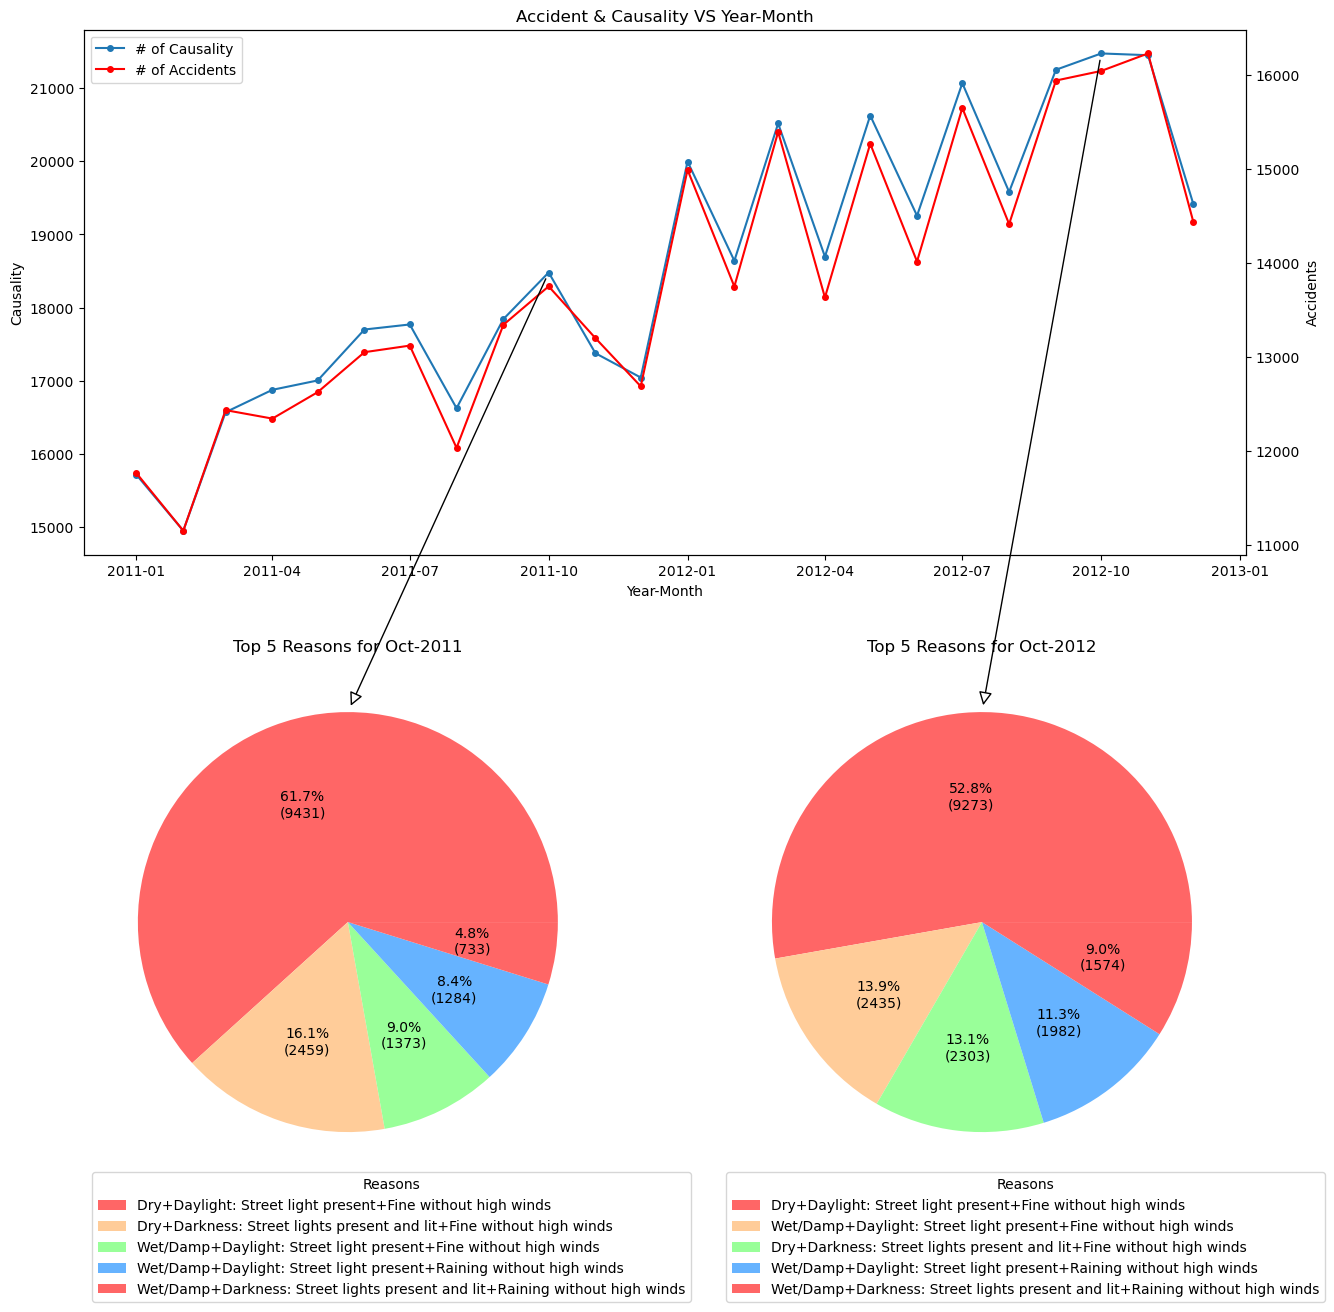

In [50]:
plot_obj1()

The below graph tells us that **police response** are respectively good when we are checking with the months

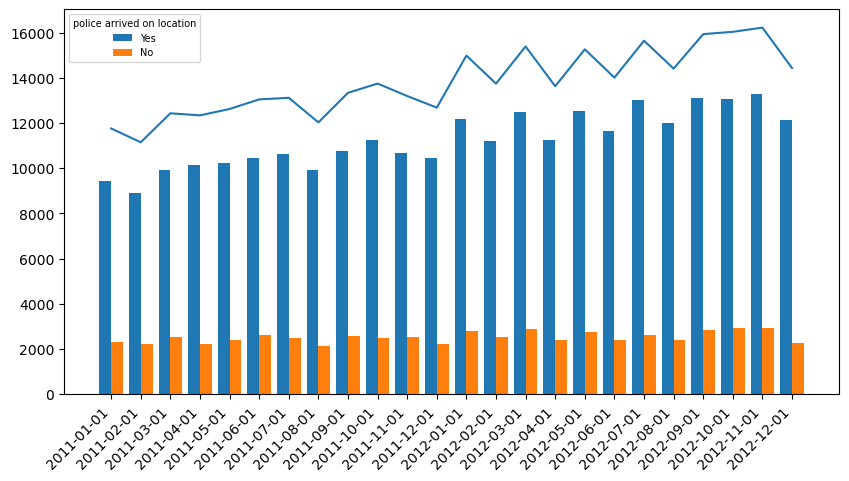

In [51]:
plot_police()

## Objective 2
### Explanation of Results
#### Analysis on Reason by region
We have identified the top 10 best and the worst regions to live in terms of causalties.
- Best region - ***Orkney Island***
- Worst region - ***Birmingham***



We have identified which reason has the highest impact on the worst places to live in terms of **# of casualty**, as it could be seen from the **Worst Locations to live in** heat map in the command below. For all the locations **R4**`(Dry+Daylight: Street light present+Fine without high winds)` reason emerges as the main factor.
Similarly, we have identified the cause of accidents in the best locations using the heat map - **best locations to live in**, and there, **R3**`(Dry+Daylight: Street light present+Fine without high winds)` is the most dominant factor.



***Note - Here you might be wondering why the different names R3 and R4 have the same reason in both scenarios. This is due to the fact that, when analysing each situation, we first identify the top 10 reasons for that cluster. For instance, we are identifying the top 10 reasons for the worst cities and those top 10 might be different from the top 10 reasons for the best cities which is why each scenario has different abbreviations.***



#### Analysis of Casualty by region
We have identified the cities which have least and maximum number of casualties as per the severities during accidents in both best and worst places to live in.<br>
If a person wants to live in the Worst region cluster and still wants to be safe then we can identify that as well.
From the **causality by region and severity** graph we can see **Barnet** has the least number of fatal accidents but **County Durham** has the highest number of fatal accidents in that region.
In the same way, if a person wants to be extra safe and wants to identify the safest place from the best region to live in the cluster that would be **Western isles** it has 0 fatal accidents and highest number of **fatal** accidents in this are in ***Rutland***
### Visualisation

#### Worst Locations to live in

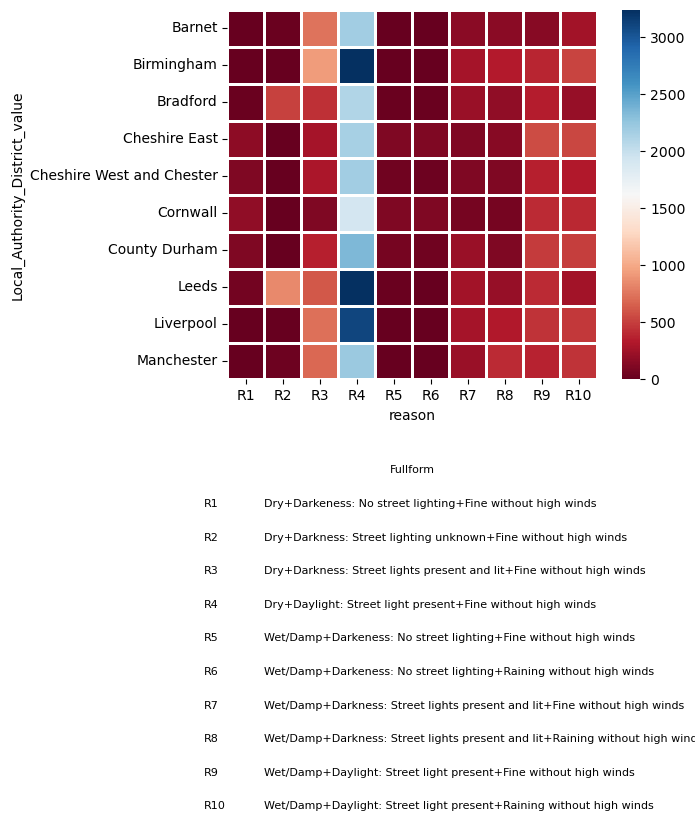

In [52]:
heatmap()

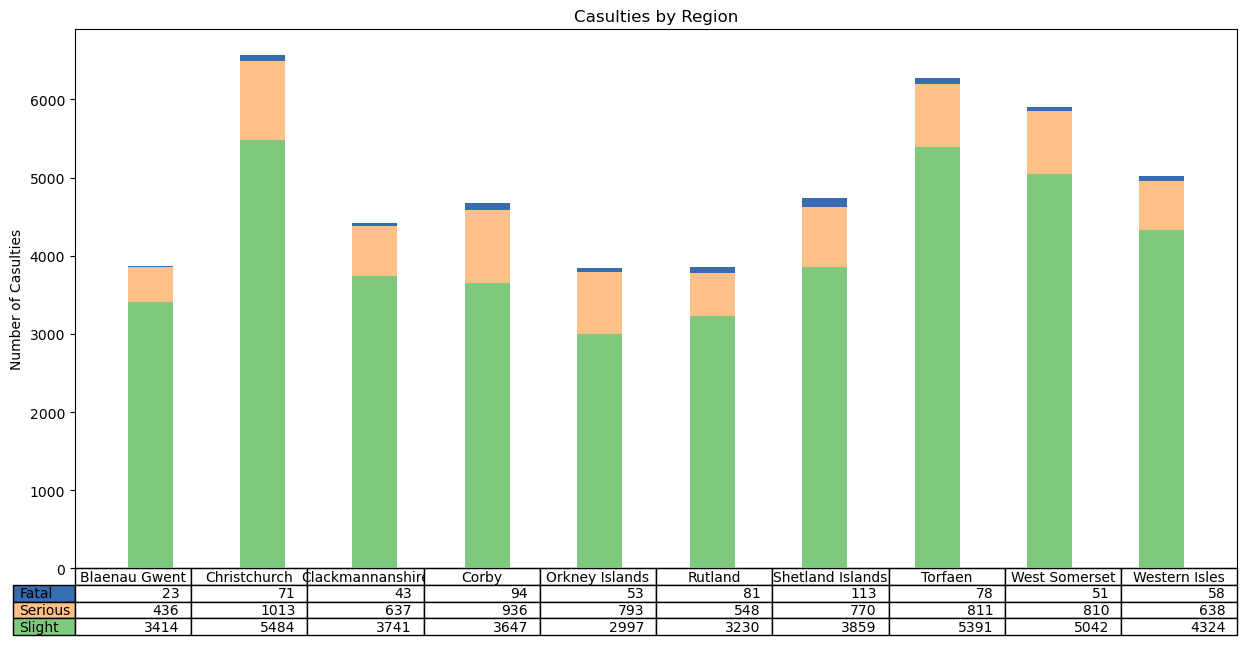

In [53]:
CbyR()

#### Best Locations to live in

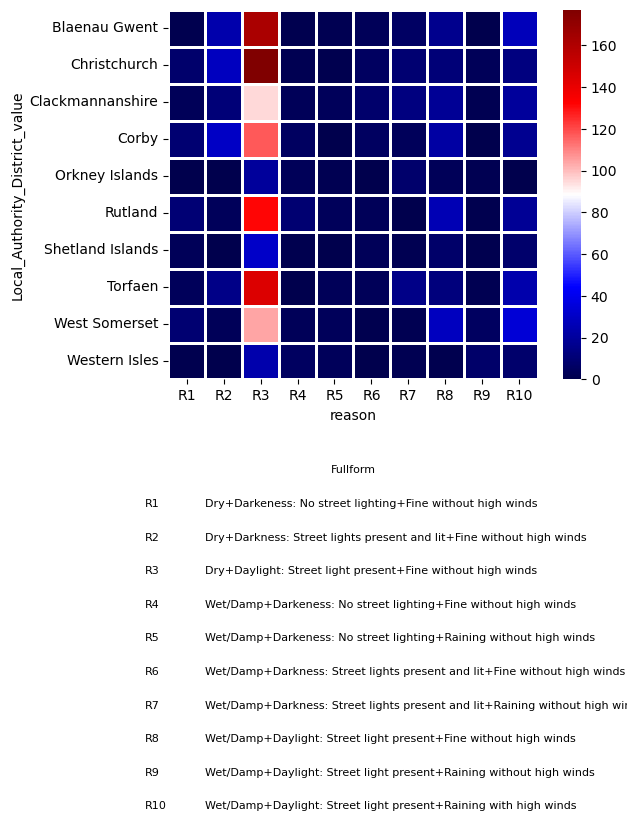

In [54]:
heatmap2()

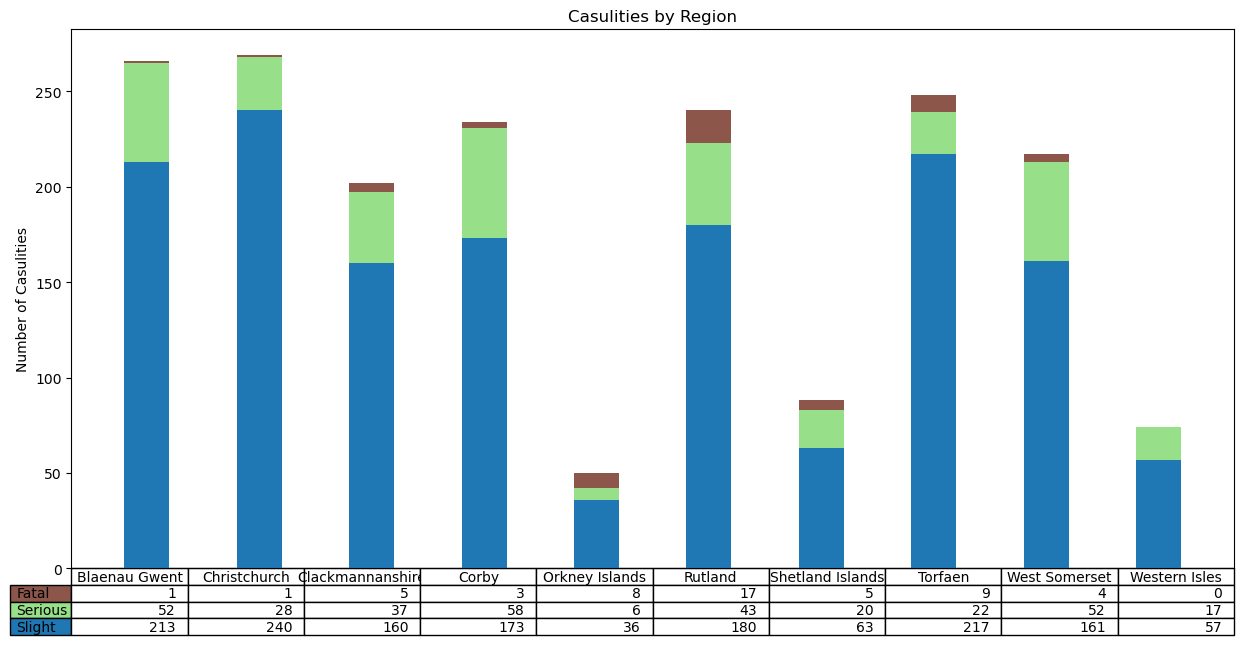

In [55]:
CbyR_best()

## Objective 3
Here we are identifying the month from the 2 years (2011 & 2012) which has the highest number of ***fatal***, ***serious*** and ***slight*** accidents.
From the analysis we can conclude through the below table:



|Highest number of accidents | Month|
|----------------------------|-------|
|Fatal |Dec, 2012|
|Serious|May, 2012|
|Slight| Oct, 2012|



Secondly, we are identifying the top 10 reasons which have the highest number of casualties by severity, from which we can see that **R4**`(Dry+Daylight: Street light present+Fine without high winds)` sores through the graph and has the maximum number of accidents across all the severities i.e. ***fatal***, ***serious*** and ***slight***



### Visualisation

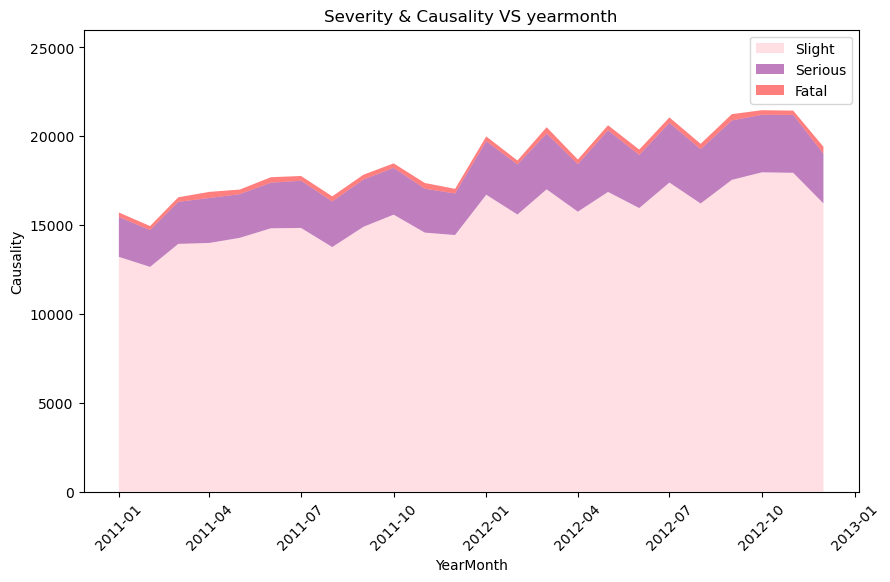

In [56]:
scvsYear()

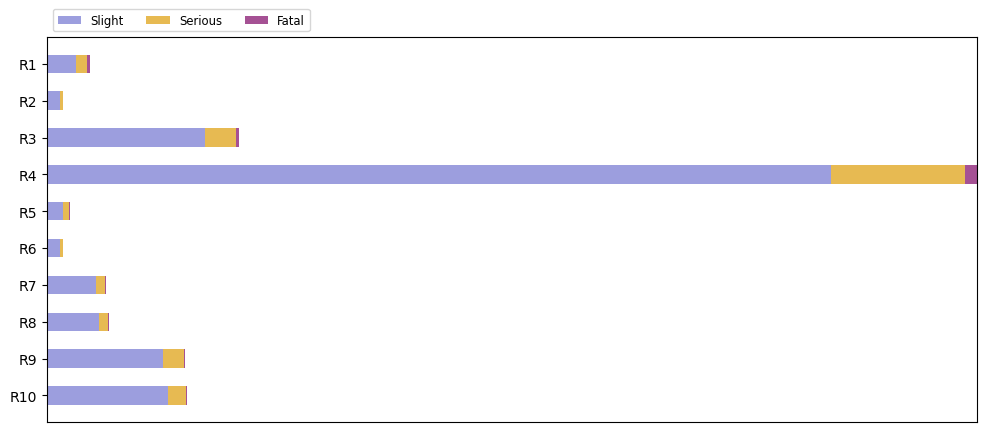

In [57]:
severity()

## Objective 4
### Explanation of Results





The number of casualties for the reasons R1, R2 and R8 for 2011 and 2012 have significant amount of differences. Whereas the reasons R5, R6, R7 and R10 have comparatively lesser differences among them in both years.




**R8** contributed to have the **most number of casualties** and on the other hand, **R7** has the **least no of casualties**.
There can be below mentioned 2 explanations for the patterns observed in the reasons where we have **R8**`(dry road conditions where there is daylight and no high winds` dominating all the reasons:



1. These accidents are happening because people are driving for long periods, and they are dehydrated and hence resulting in accidents.
2. The dry weather is causing mirages and causing accidents.



Unfortunately, we don't have the data to make a conclusion on the same.




**Police performance over the reasons**<br>



It can be clearly understood that the police made sure to attend the scene of the accidents no matter what the reason was. The number of times police did not attend was very less when compared to the number of times they did attend the accident scene.




**Dry road conditions where there is daylight and no high winds** contributes to be the reason due to which the most number of casualties were there for both the cases where the police attended and did not attend the scene of the accident and on the other hand **R2**`(Wet road conditions where there is Daylight and Raining with high winds)` has the least no of casualties probably because they are enjoying the weather from a safe distance.




### Visualisation

The Reasons(R1-R10) in the labels below are a combination of Road conditon + Lightning condition + Weather condition

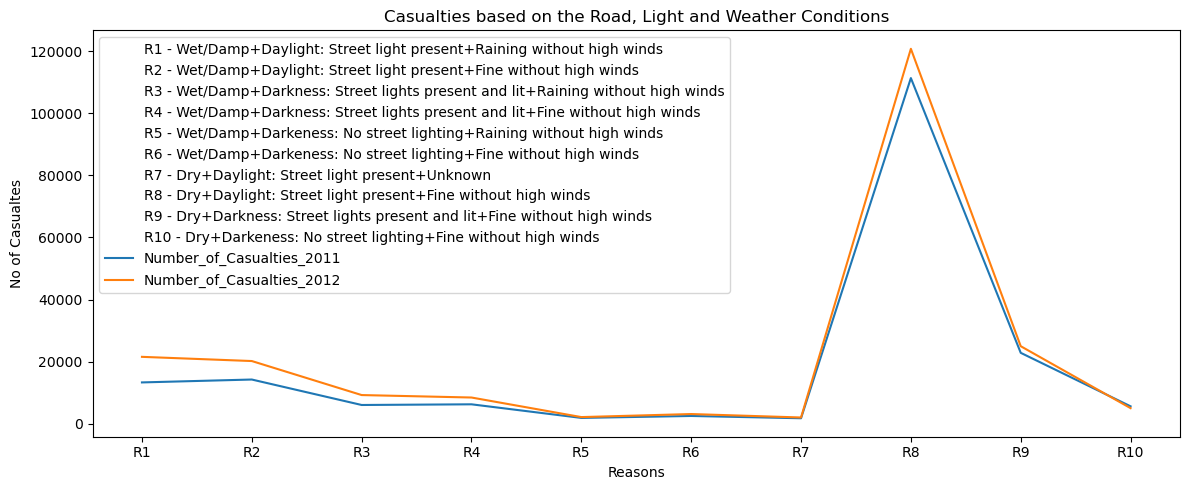

In [58]:
reason_casulties()

The Reasons(R1-R10) in the labels below are a combination of Road conditon + Lightning condition + Weather condition

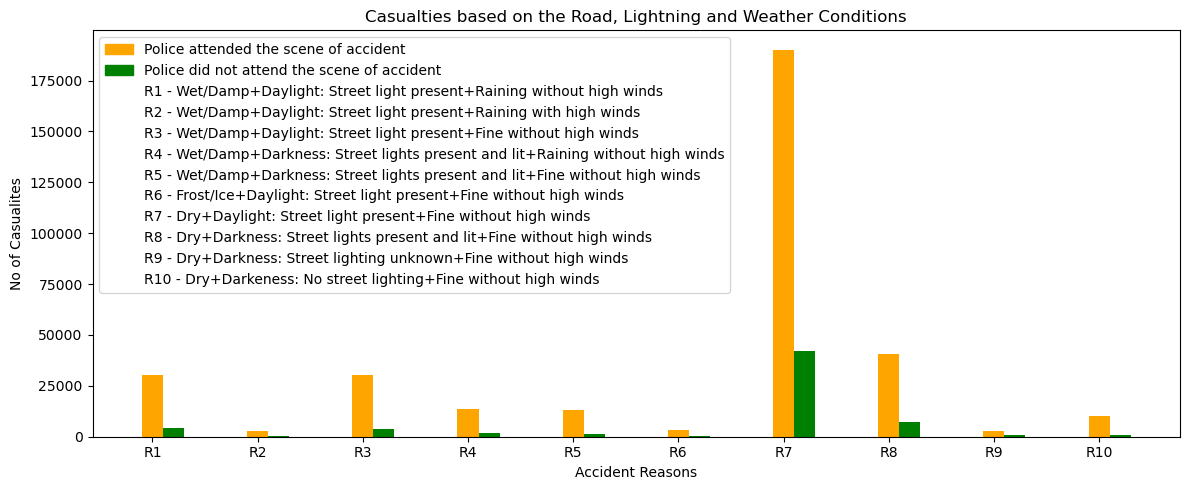

In [59]:
Police_severity()

# Conclusion (5 marks)
### Achievements
Surprisingly, the highest number of accidents happened **during day-light, when the roads were clean** and not during the conditions such as raining, snowing or at night, and there were no external forces that would have acted as a catalyst. 
- The **highest** number of accidents have taken place in the autumn month (**October**) for both the **years(2011 & 2012)** which is considered to be one of the best months to visit UK. The **total number of accidents** for both years are **0.44 million**.
- Fortunately, the **fatal accidents are very low** i.e. in k's (thousands), to be precise 6.8k. Serious accidents are relatively high but still low in thousands i.e. 66K and for **Slight accidents** they are approaching to **half a million** i.e. 0.37 million. 
- One of the great things about UK is its Police Force Response, it doesn't matter what the condition is or the time of the year is, **Police response has always been good**. 
- Lastly we have seen that the highest number of accidents have taken place in **Birmingham followed by Leeds, Liverpool, and Manchester** which pushes us to investigate more on the cause behind these particular cities and any other external factors that can play a significant role.

### Limitations

Due to the limited set of factors such as surroundings, human control or physical facilities at the site of an accident but there is no information present if the **person was drunk driving or how was their mood or how is their physical and mental health or was they even eligible to ride the vehicle if they were riding one during accident**. We don't have the details of the casualty such as their age and sex itself and hence the measures so that the massive accidents in big cities such as Birmingham, Manchester, Leeds and Liverpool which should be taken by the government or by people can be commented on.

### Future Work
In future work we would like to obtain detailed data related to the casaulties as mentioned in the limitations, with that data we can further analyse and hypothise if the reasons: **if the driver was drunk, if the driver has a driving license, if the driver was suffering from any medical issues during the accident**, contributed to the accidents and casualties.